In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

Import MNIST dataset

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Show dataset dimension

In [26]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


Show some images in the dataset and their label

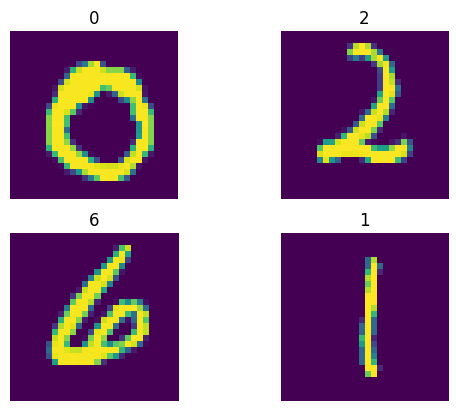

In [27]:
plt.subplot(2,2,1)
plt.imshow(x_train[56])
plt.title(y_train[56])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(x_train[122])
plt.title(y_train[122])
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(x_train[2345])
plt.title(y_train[2345])
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(x_train[7896])
plt.title(y_train[7896])
plt.axis("off")
plt.show()

Let's divide our dataset in a training and validation part

In [28]:
x_t = x_train[:int(0.8*x_train.shape[0]),:]     # data TRAIN
y_t = y_train[:int(0.8*y_train.shape[0])]       # label TRAIN
x_val = x_train[int(0.8*x_train.shape[0]):,:]   # data VALIDATION
y_val = y_train[int(0.8*y_train.shape[0]):]     # label VALIDATION

print('x_train shape: ', x_t.shape)
print('y_train shape: ', y_t.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)

x_train shape:  (48000, 28, 28)
y_train shape:  (48000,)
x_val shape:  (12000, 28, 28)
y_val shape:  (12000,)


Normalize input images between 0 and 1

In [29]:
x_t = x_t / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

Create model

In [30]:
# Keras model
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [32]:
model.compile(
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
 metrics=['accuracy'])

model.fit(x_t, y_t, validation_data=(x_val, y_val), epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5038 - accuracy: 0.8698 - val_loss: 0.3162 - val_accuracy: 0.9135
Epoch 2/5
1500/1500 [==============================] - 1s 974us/step - loss: 0.3169 - accuracy: 0.9124 - val_loss: 0.2859 - val_accuracy: 0.9200
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2929 - accuracy: 0.9180 - val_loss: 0.2780 - val_accuracy: 0.9228
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2805 - accuracy: 0.9213 - val_loss: 0.2724 - val_accuracy: 0.9258
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2739 - accuracy: 0.9228 - val_loss: 0.2667 - val_accuracy: 0.9255


Visualize trained weights as an image

Visualize trained weights as an image


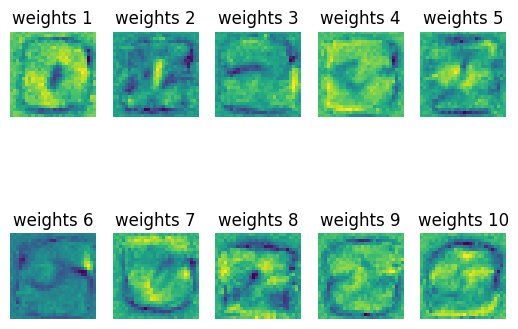

In [33]:
#print(model.trainable_variables)
print("Visualize trained weights as an image")
w0 = np.array(model.trainable_variables[0][:,0])
w1 = np.array(model.trainable_variables[0][:,1])
w2 = np.array(model.trainable_variables[0][:,2])
w3 = np.array(model.trainable_variables[0][:,3])
w4 = np.array(model.trainable_variables[0][:,4])
w5 = np.array(model.trainable_variables[0][:,5])
w6 = np.array(model.trainable_variables[0][:,6])
w7 = np.array(model.trainable_variables[0][:,7])
w8 = np.array(model.trainable_variables[0][:,8])
w9 = np.array(model.trainable_variables[0][:,9])
w0 = np.array(w0).reshape((28,28))
w1 = np.array(w1).reshape((28,28))
w2 = np.array(w2).reshape((28,28))
w3 = np.array(w3).reshape((28,28))
w4 = np.array(w4).reshape((28,28))
w5 = np.array(w5).reshape((28,28))
w6 = np.array(w6).reshape((28,28))
w7 = np.array(w7).reshape((28,28))
w8 = np.array(w8).reshape((28,28))
w9 = np.array(w9).reshape((28,28))

plt.subplot(2,5,1)
plt.title("weights 1")
plt.imshow(w0)
plt.axis("off")
plt.subplot(2,5,2)
plt.title("weights 2")
plt.imshow(w1)
plt.axis("off")
plt.subplot(2,5,3)
plt.title("weights 3")
plt.imshow(w2)
plt.axis("off")
plt.subplot(2,5,4)
plt.title("weights 4")
plt.imshow(w3)
plt.axis("off")
plt.subplot(2,5,5)
plt.title("weights 5")
plt.imshow(w4)
plt.axis("off")
plt.subplot(2,5,6)
plt.title("weights 6")
plt.imshow(w5)
plt.axis("off")
plt.subplot(2,5,7)
plt.title("weights 7")
plt.imshow(w6)
plt.axis("off")
plt.subplot(2,5,8)
plt.title("weights 8")
plt.imshow(w7)
plt.axis("off")
plt.subplot(2,5,9)
plt.title("weights 9")
plt.imshow(w8)
plt.axis("off")
plt.subplot(2,5,10)
plt.title("weights 10")
plt.imshow(w9)
plt.axis("off")
plt.show()

Evaluate performances on test set

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 898us/step - loss: 0.2729 - accuracy: 0.9238


[0.27294784784317017, 0.923799991607666]

Evaluate output of the model [probability of belonging to each class] and real label on some test images

In [35]:
predictions = np.around(np.array(model(x_test)),3)
print(predictions[0], y_test[0])
print(predictions[1], y_test[1])
print(predictions[2], y_test[2])
print(predictions[3], y_test[3])
print(predictions[4], y_test[4])
print(predictions[5], y_test[5])

[0.034 0.    0.07  0.959 0.004 0.062 0.    1.    0.093 0.695] 7
[0.519 0.02  0.999 0.391 0.    0.635 0.852 0.    0.314 0.   ] 2
[0.001 0.994 0.648 0.361 0.042 0.113 0.161 0.16  0.435 0.067] 1
[1.    0.    0.104 0.007 0.    0.133 0.055 0.026 0.041 0.016] 0
[0.063 0.    0.185 0.007 0.991 0.012 0.113 0.221 0.377 0.651] 4
[0.    0.998 0.454 0.499 0.011 0.019 0.01  0.516 0.587 0.197] 1


[7 2 1 ... 4 5 6]
[0.294 0.    0.071 0.    0.631 0.519 0.998 0.    0.104 0.001] 5


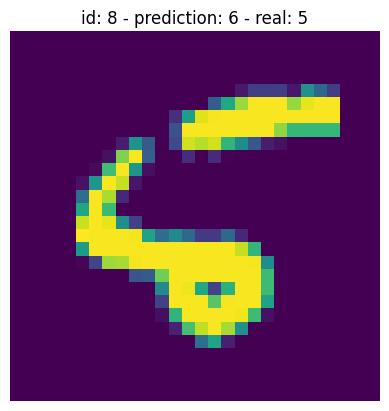

[0.863 0.    0.036 0.    0.518 0.515 0.714 0.    0.132 0.001] 4


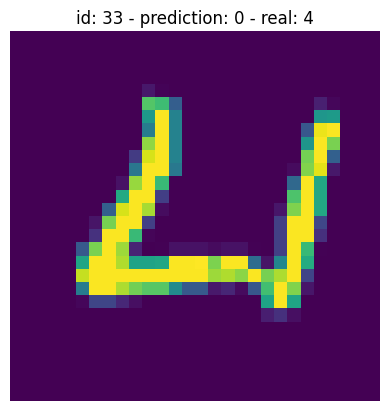

[0.005 0.009 0.933 0.918 0.005 0.019 0.007 0.    0.529 0.039] 3


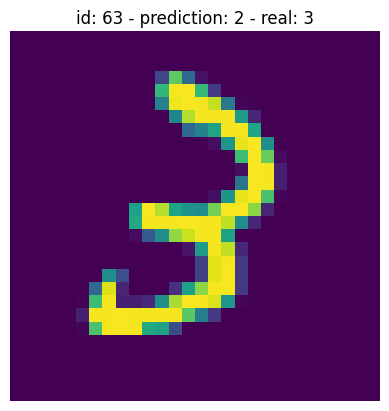

[0.004 0.003 0.396 0.16  0.064 0.002 0.194 0.127 0.016 0.002] 6


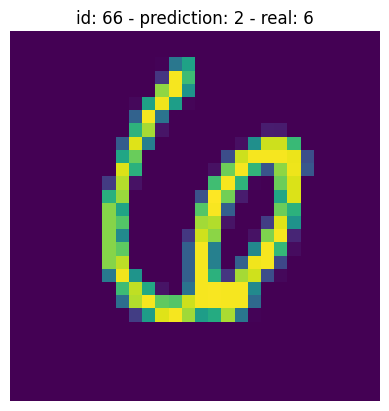

[0.004 0.049 0.148 0.123 0.769 0.149 0.026 0.126 0.487 0.754] 9


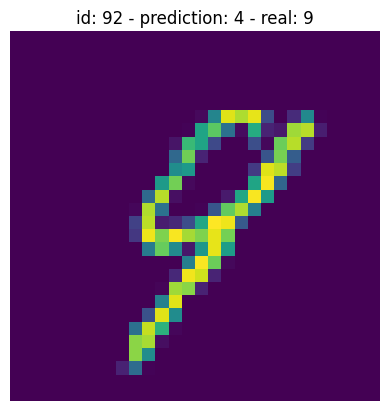

[0.    0.    0.    0.093 0.993 0.    0.    0.983 0.801 0.908] 7


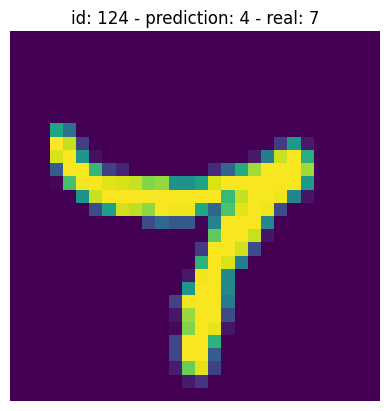

[0.    0.052 0.064 0.027 0.242 0.027 0.019 0.002 0.13  0.852] 2


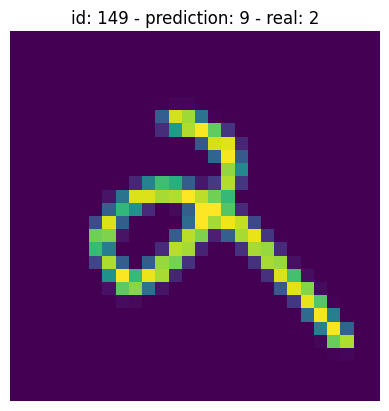

[0.013 0.    0.37  0.078 0.02  0.014 0.    0.005 0.868 0.818] 9


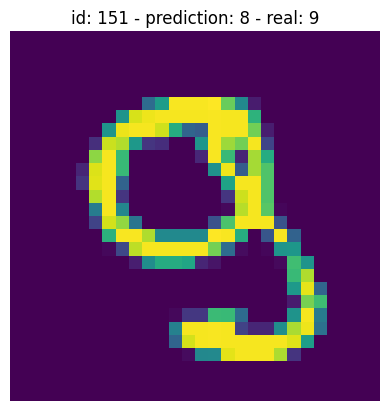

[0.    0.    0.029 0.871 0.817 0.165 0.002 0.477 0.367 0.828] 9


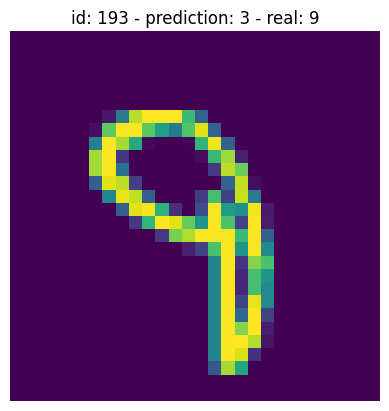

[0.    0.128 0.357 0.814 0.09  0.85  0.038 0.007 0.846 0.272] 3


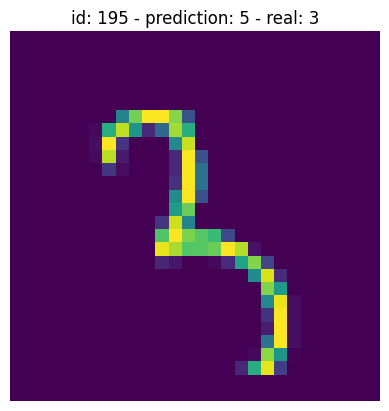

[0.278 0.003 0.003 0.288 0.055 0.804 0.    0.867 0.333 0.478] 5


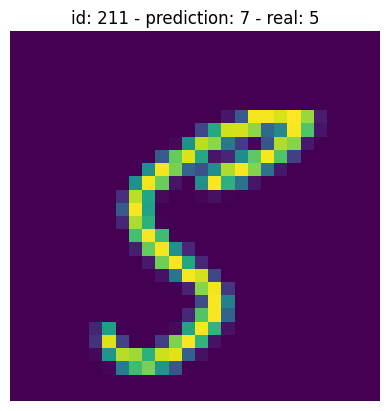

[0.112 0.008 0.015 0.001 0.048 0.953 0.93  0.    0.565 0.   ] 6


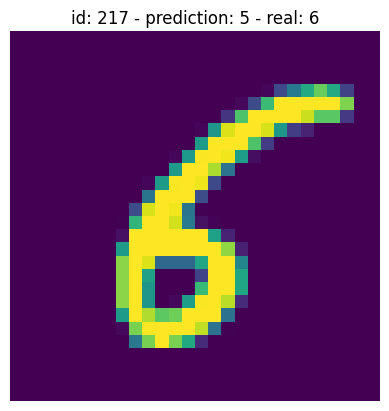

[0.    0.    0.008 0.545 0.007 0.146 0.    0.961 0.933 0.9  ] 8


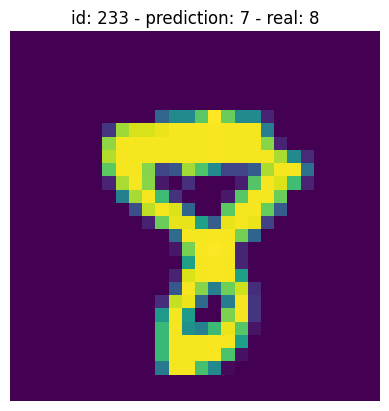

[0.076 0.    0.299 0.61  0.044 0.48  0.001 0.005 0.833 0.225] 9


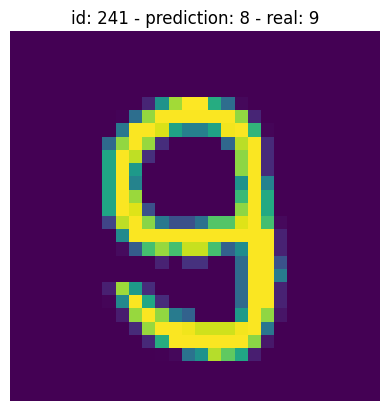

correct:  9238
errors:  762
accuracy:  0.9238


In [36]:
predictions_class = np.argmax(predictions, axis=1)
print(predictions_class)

count_errors = 0
for i in range(len(predictions_class)):
  if predictions_class[i]!=y_test[i]:
    count_errors+=1
    if count_errors<15:
      print(predictions[i], y_test[i])
      plt.imshow(x_test[i])
      plt.title("id: " + str(i) + " - prediction: " + str(predictions_class[i]) + " - real: " + str(y_test[i]))
      plt.axis("off")
      plt.show()

accuracy = (len(predictions_class)-count_errors)/len(predictions_class)
print("correct: ", len(predictions_class)-count_errors)
print("errors: ", count_errors)
print("accuracy: ", accuracy)

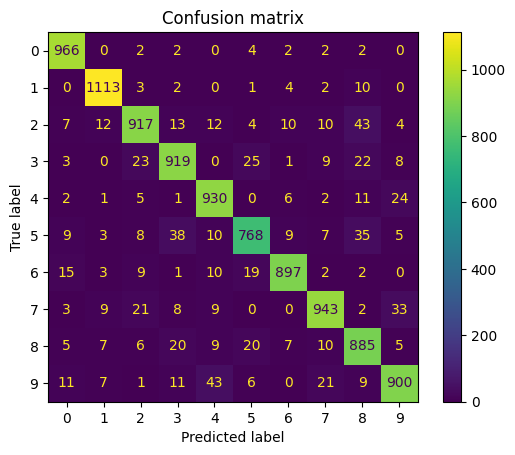

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()
plt.title("Confusion matrix")
plt.show()

Increase the complexity of the network

In [38]:
# Keras model
model_2 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(32, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10, activation="softmax"),
])

In [39]:
model_2.summary()

model_2.compile(
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
 metrics=['accuracy'])

model_2.fit(x_t, y_t, validation_data=(x_val, y_val), epochs=5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104

Evaluate performances on test set

In [40]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 950us/step - loss: 0.0921 - accuracy: 0.9736


[0.09209482371807098, 0.9735999703407288]

Evaluate output of the model [probability of belonging to each class] and real label on some test images

In [41]:
predictions = np.around(np.array(model_2(x_test)),3)
print(predictions[0], y_test[0])
print(predictions[1], y_test[1])
print(predictions[2], y_test[2])
print(predictions[3], y_test[3])
print(predictions[4], y_test[4])
print(predictions[5], y_test[5])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[0.    0.999 0.    0.    0.    0.    0.    0.    0.    0.   ] 1
[0.997 0.    0.001 0.    0.    0.    0.001 0.    0.    0.   ] 0
[0.    0.    0.    0.    0.999 0.    0.    0.    0.    0.001] 4
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1


[7 2 1 ... 4 5 6]
[0.001 0.001 0.006 0.034 0.    0.003 0.    0.589 0.34  0.026] 8


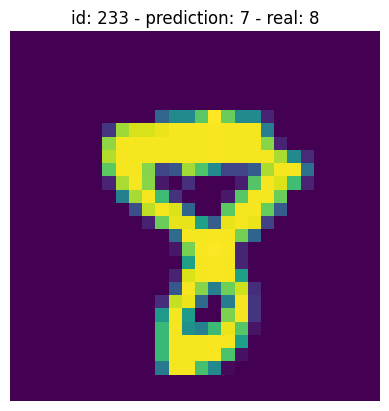

[0.001 0.    0.617 0.    0.003 0.    0.378 0.    0.    0.   ] 4


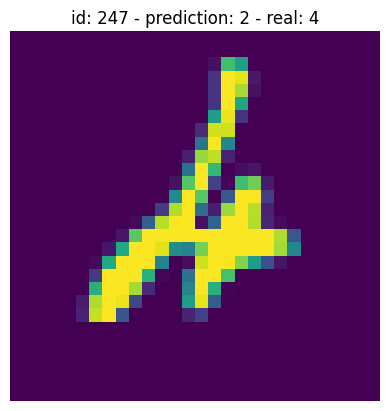

[0.982 0.    0.    0.    0.    0.    0.017 0.    0.    0.   ] 6


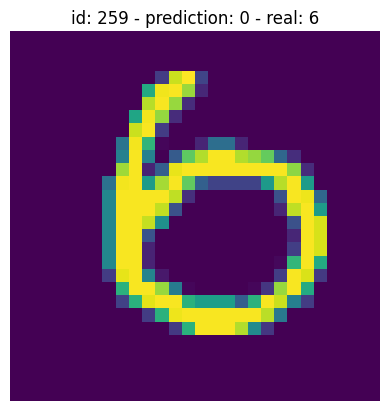

[0.002 0.212 0.002 0.01  0.014 0.008 0.002 0.585 0.059 0.108] 9


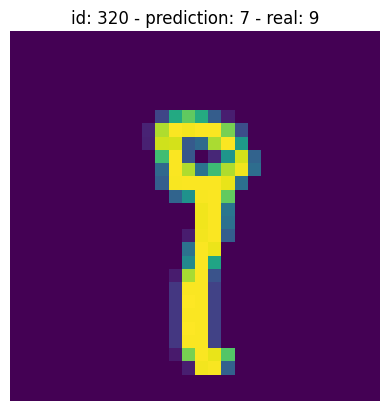

[0.    0.001 0.034 0.023 0.    0.    0.    0.941 0.    0.   ] 2


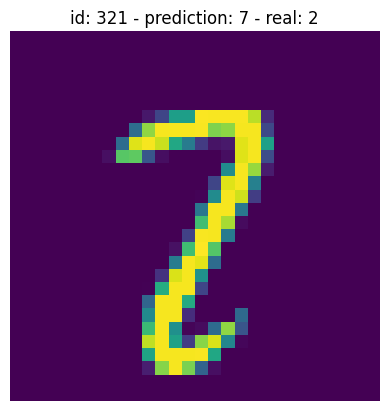

[0.    0.002 0.    0.675 0.    0.322 0.    0.    0.    0.   ] 5


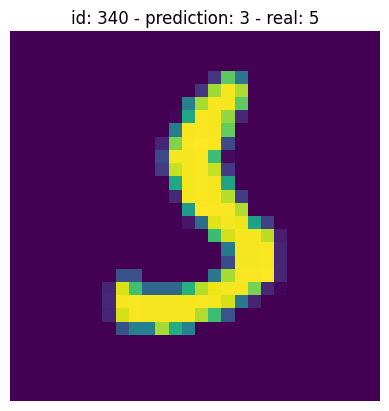

[0.    0.001 0.002 0.002 0.845 0.    0.    0.001 0.077 0.071] 9


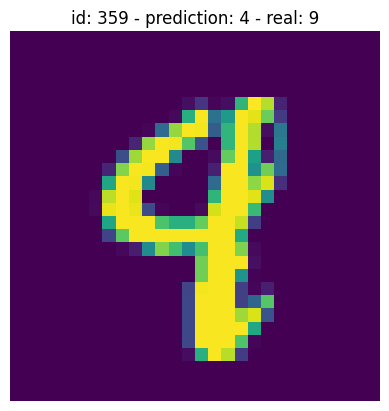

[0.    0.    0.001 0.005 0.    0.    0.    0.994 0.    0.   ] 3


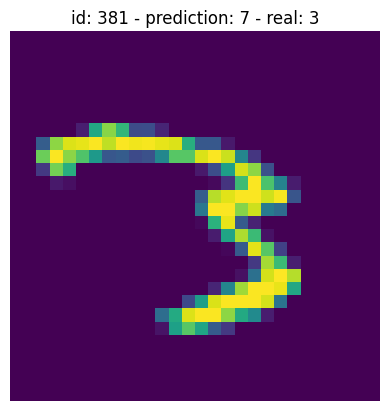

[0.    0.001 0.    0.001 0.497 0.    0.    0.095 0.    0.405] 9


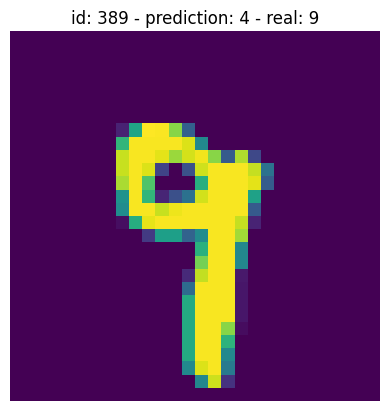

[0.944 0.    0.001 0.001 0.    0.021 0.034 0.    0.    0.   ] 6


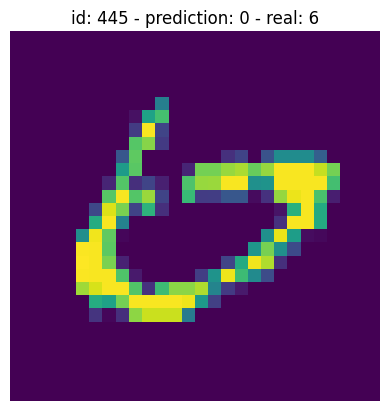

[0.    0.    0.    0.006 0.    0.004 0.    0.    0.979 0.011] 9


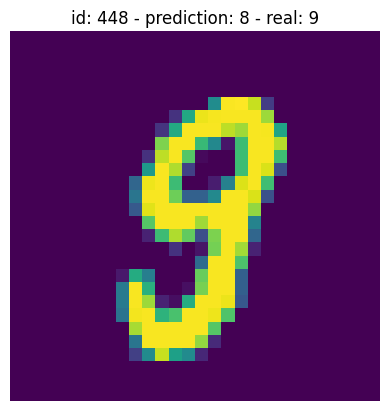

[0.    0.02  0.921 0.001 0.    0.    0.    0.    0.058 0.   ] 8


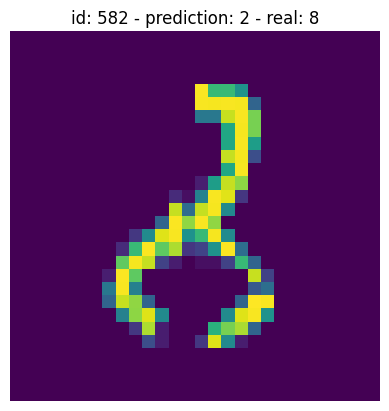

[0.003 0.    0.441 0.    0.139 0.    0.393 0.    0.023 0.   ] 4


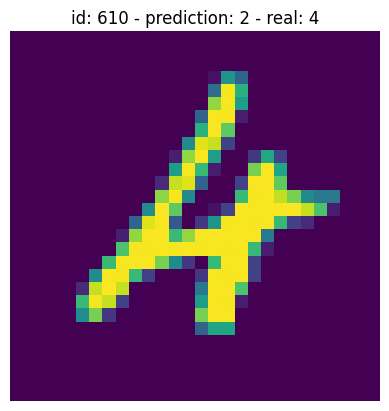

[0.001 0.22  0.408 0.003 0.001 0.001 0.034 0.005 0.326 0.   ] 1


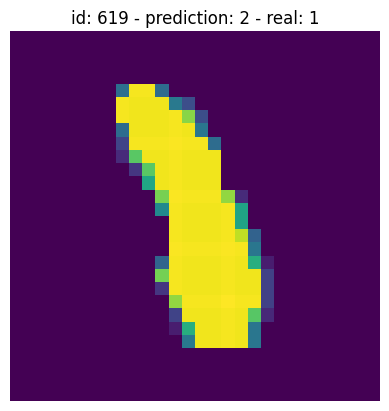

correct:  9736
errors:  264
accuracy:  0.9736


In [42]:
predictions_class_2 = np.argmax(predictions, axis=1)
print(predictions_class_2)

count_errors = 0
for i in range(len(predictions_class_2)):
  if predictions_class_2[i]!=y_test[i]:
    count_errors+=1
    if count_errors<15:
      plt.imshow(x_test[i])
      plt.title("id: " + str(i) + " - prediction: " + str(predictions_class_2[i]) + " - real: " + str(y_test[i]))
      print(predictions[i], y_test[i])
      plt.axis("off")
      plt.show()

accuracy = (len(predictions_class_2)-count_errors)/len(predictions_class_2)
print("correct: ", len(predictions_class_2)-count_errors)
print("errors: ", count_errors)
print("accuracy: ", accuracy)

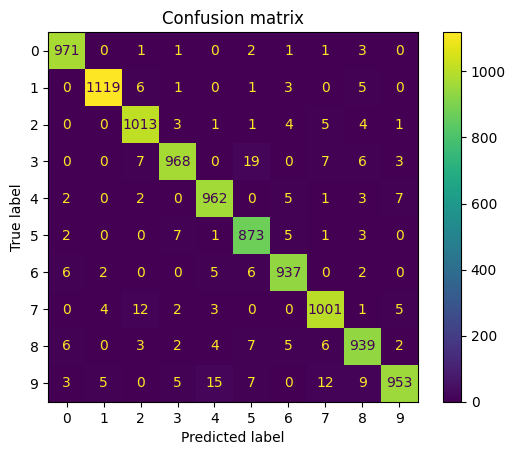

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions_class_2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()
plt.title("Confusion matrix")
plt.show()